<a href="https://colab.research.google.com/github/Bady9898/Decision-Tree-Random-Forest/blob/main/Decision_trees_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Company_Data.csv",encoding = 'latin 1')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
df1 = df.copy()

In [6]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
df1.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [8]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [11]:
df1.shape

(400, 11)

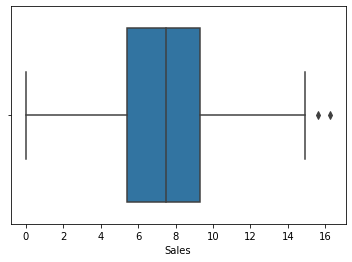

In [12]:
#outlier check
ax = sn.boxplot(df1['Sales'])

In [13]:
#Data has 2 outliers
plot.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


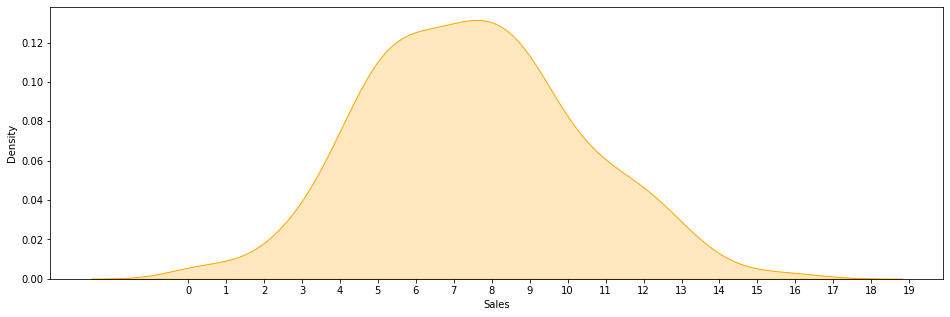

In [14]:
plot.figure(figsize = (16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sn.kdeplot(df1['Sales'],shade = True,color = 'Orange')
plot.xticks([i for i in range(0,20,1)])
plot.show()

In [15]:
#Data is skewed on the right side and has negative kurtosis 
obj_colum = df1.select_dtypes(include = 'object').columns.tolist()

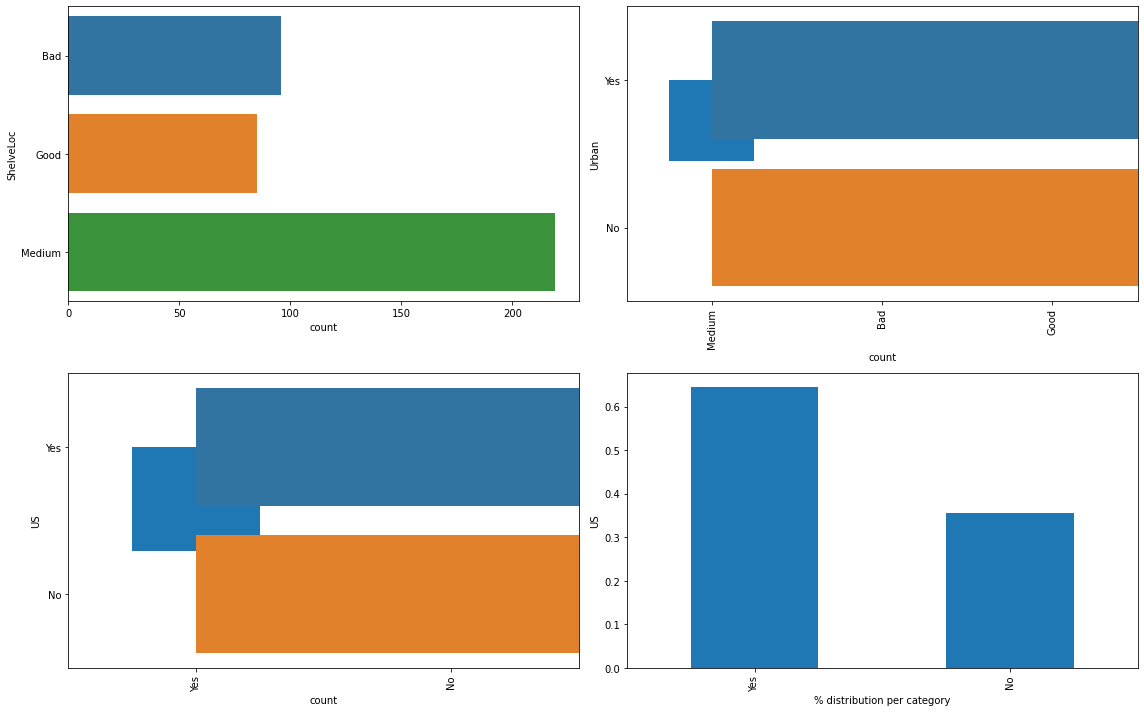

In [16]:
plot.figure(figsize = (16,10))
for i,col in enumerate(obj_colum,1):
    plot.subplot(2,2,i)
    sn.countplot(data = df1,y = col)
    plot.subplot(2,2,i+1)
    df1[col].value_counts(normalize = True).plot.bar()
    plot.ylabel(col)
    plot.xlabel('% distribution per category')
plot.tight_layout()
plot.show()  

In [17]:
num_columns = df1.select_dtypes(exclude = 'object').columns.tolist()

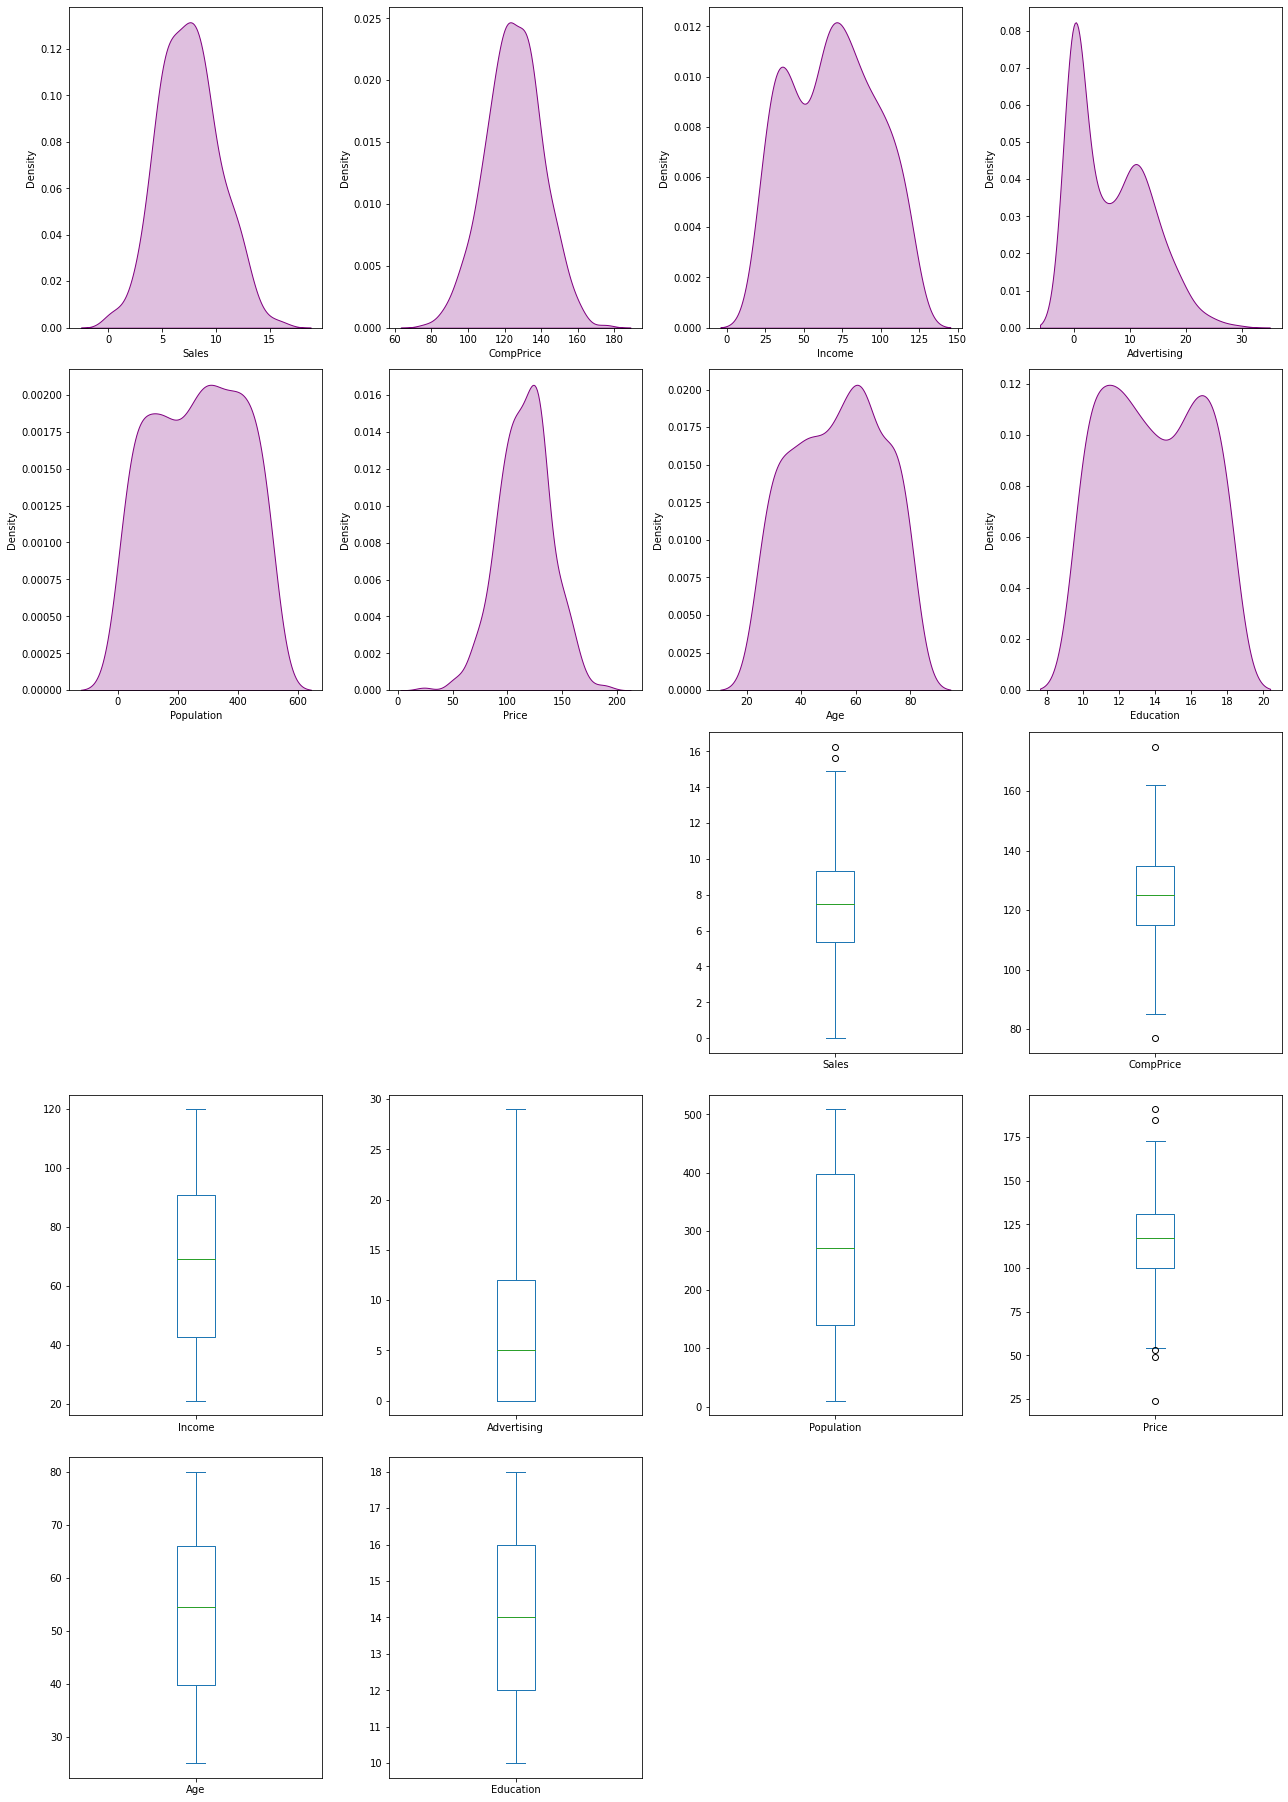

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [18]:
plot.figure(figsize = (18,40))
for i,col in enumerate(num_columns,1):
    plot.subplot(8,4,i)
    sn.kdeplot(df[col],color = 'purple',shade = True)
    plot.subplot(8,4,i+10)
    df[col].plot.box()
plot.tight_layout() 
plot.show()
num_data = df[num_columns]
pd.DataFrame(data = [num_data.skew(),num_data.kurtosis()],index = ['skewness','kurtosis'])

In [19]:
corr = df1.corr()

In [20]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [21]:
corr = df1.corr()

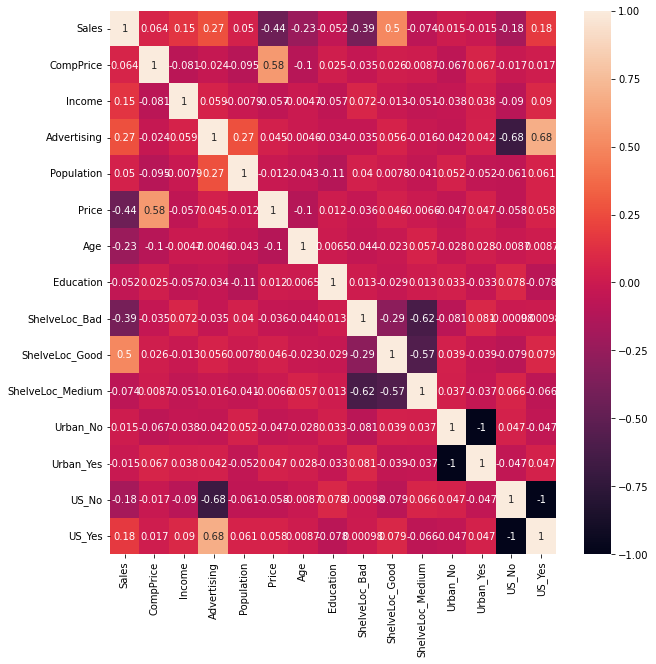

In [22]:
plot.figure(figsize = (10,10))
sn.heatmap(corr,annot = True)

**Decision Tree - Model**

Since the target variable is continuous, we create a class of the value based on the

mean <= 7.49 == "Small" & mean > 7.49 == "large"

In [23]:
df1["sales"] = "small"
df1.loc[df1["Sales"] > 7.49,"sales"] = "large"
df1.drop(["Sales"],axis = 1,inplace = True)

In [24]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [26]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [27]:
model = DT(criterion = 'entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
pred_train = model.predict(x_train)

In [29]:
accuracy_score(y_train,pred_train)

1.0

In [30]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]])

In [31]:
pred_test = model.predict(x_test)

In [32]:
accuracy_score(y_test,pred_test)

0.7625

In [33]:
confusion_matrix(y_test,pred_test)

array([[27, 13],
       [ 6, 34]])

In [34]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [35]:
df_t

,Actual,Predicted
89,large,small
184,large,large
274,small,large
191,small,small
74,small,small
...,...,...
243,large,small
378,small,small
179,large,small
183,small,small


In [36]:
cols = list(df1.columns)

In [37]:
predictors = cols[0:14]
target = cols[14]

In [38]:
dot_data = StringIO()

In [39]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names = predictors,class_names = target, impurity = False )

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [41]:
#Calculating the importance of the features 
model.feature_importances_

array([0.17311548, 0.16566937, 0.05891964, 0.05355061, 0.246655  ,
       0.11293833, 0.02194045, 0.03693233, 0.09426395, 0.        ,
       0.        , 0.01639144, 0.        , 0.0196234 ])

In [42]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [43]:
fi

,feature,importance
4,Price,0.246655
0,CompPrice,0.173115
1,Income,0.165669
5,Age,0.112938
8,ShelveLoc_Good,0.094264
2,Advertising,0.058920
3,Population,0.053551
7,ShelveLoc_Bad,0.036932
6,Education,0.021940
13,US_Yes,0.019623


 Therefore, we come to a conclusion that Price is the most important feature.